# Regresión lineal simple en Python

## El paquete statsmodel para regresión lineal


In [20]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
lm = smf.ols(formula="Sales~TV", data = data).fit()

In [5]:
lm

In [6]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo Lineal predictivo seria

     Sales = 7.032594 + 0.047537 * TV

In [7]:
# 100 Euros mas en publicidad se traduciria en 0.04 en venta de productos

In [8]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [9]:
lm.rsquared

0.611875050850071

In [10]:
lm.rsquared_adj # Modificacion de un pequeno factor

0.6099148238341623

In [11]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           1.47e-42
Time:                        17:05:42   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
sales_pred = lm.predict(pd.DataFrame(data["TV"]))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

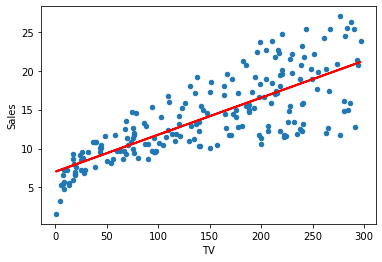

In [14]:
%matplotlib inline
data.plot(kind = 'scatter', x = "TV", y="Sales")
plt.plot(pd.DataFrame(data["TV"]), sales_pred, c="red", linewidth = 2)

In [15]:
data["sales_pred"] = 7.032594+0.047537*data["TV"]

In [16]:
data["RSE"] = (data["Sales"]-data["sales_pred"])**2

In [18]:
SSD = sum(data["RSE"])
SSD

2102.5305838896525

In [21]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

3.258656369238098

In [22]:
sales_m = np.mean(data["Sales"])

In [23]:
sales_m

14.0225

In [24]:
error = RSE/sales_m

In [25]:
error

0.23238768901680143

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <BarContainer object of 10 artists>)

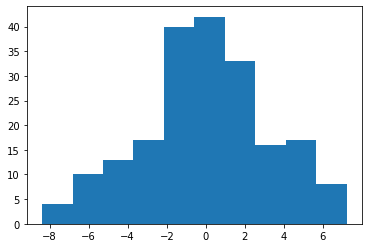

In [26]:
plt.hist(data["Sales"]-data["sales_pred"])